In [24]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

import os

# set the current working directory
os.chdir('/Users/efz/British Airline Data Science Virtual Internship Program')
# verify that the working directory has been set correctly
print(os.getcwd())

/Users/efz/British Airline Data Science Virtual Internship Program


In [27]:
# set the file path to the CSV file
file_path = "/Users/efz/British Airline Data Science Virtual Internship Program/cleaned-BA-reviews.csv"

# create the DataFrame by reading the CSV file
df = pd.read_csv(file_path, index_col=0)

# reset the index to sequential integers starting from 0
df = df.reset_index(drop=True)


In [28]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified | This was my first time flyin...      1  2023-01-28   
1  ✅ Trip Verified |  Lots of cancellations and d...      9  2023-01-24   
2  ✅ Trip Verified | BA 242 on the 6/2/23. Boardi...     10  2023-01-24   
3  ✅ Trip Verified |  Not only my first flight in...     10  2023-01-23   
4  ✅ Trip Verified |  My husband and myself were ...     10  2023-01-21   

          country  verified                                             corpus  
0  United Kingdom      True  first time flying ba pleasantly surprised isla...  
1          Canada      True  lot cancellation delay one apologized edinburg...  
2  United Kingdom      True  ba boarding delayed due late arrival incoming ...  
3           Spain      True  first flight year also first time back england...  
4  United Kingdom      True  husband flying madrid rd february legal matter...

In [29]:
# What is the average overall rating given for British Airways?
df.stars.mean()

4.837182448036952

Text(0.5, 0.98, 'Counts for each ratings')

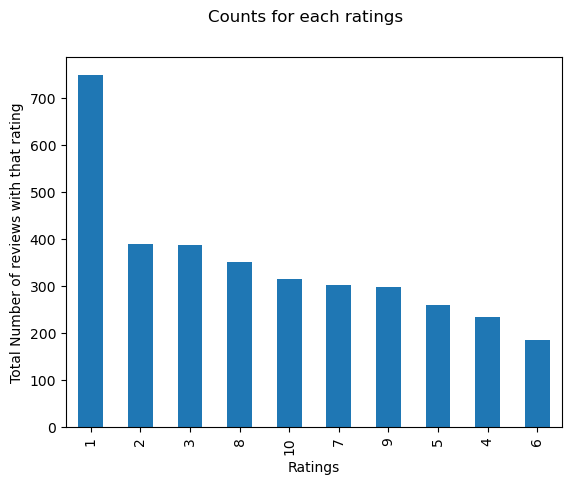

In [10]:
#What is the total counts for each ratings?
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [12]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [13]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [14]:
df_ratings

index  stars  pct_values
0      1    748       21.59
1      2    389       11.23
2      3    386       11.14
3      8    350       10.10
4     10    314        9.06
5      7    302        8.72
6      9    298        8.60
7      5    260        7.51
8      4    233        6.73
9      6    184        5.31

   Stars  Counts
0      1     100
1      2     200
2      3     300
3      4     400
4      5     500


Text(0.5, 1.0, 'Counts for each rating')

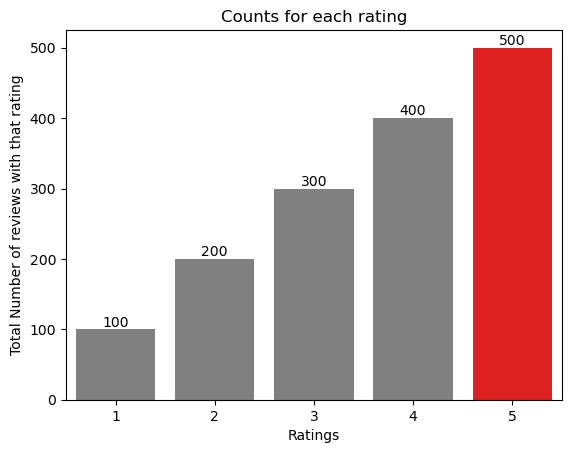

In [24]:
import pandas as pd
import seaborn as sns

# create a sample DataFrame
data = {
    'Stars': [1, 2, 3, 4, 5],
    'Counts': [100, 200, 300, 400, 500]
}
df_ratings = pd.DataFrame(data)

# check the column names
print(df_ratings.head())

# create the bar plot with seaborn
clrs = ['Red' if (x ==  max(df_ratings.Counts)) else 'grey' for x in df_ratings.Counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.Counts, data=df_ratings, errwidth=0,
                palette=clrs)

ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each rating")


In [18]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


In [25]:
# Which country most review comes from?
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)


Text(0.5, 1.0, 'Maximum number of review by country')

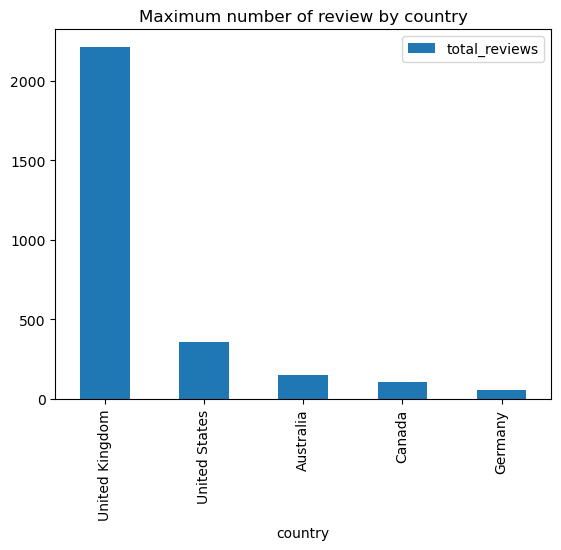

In [26]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [28]:
#Which country provided on average highest ratings?
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [29]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

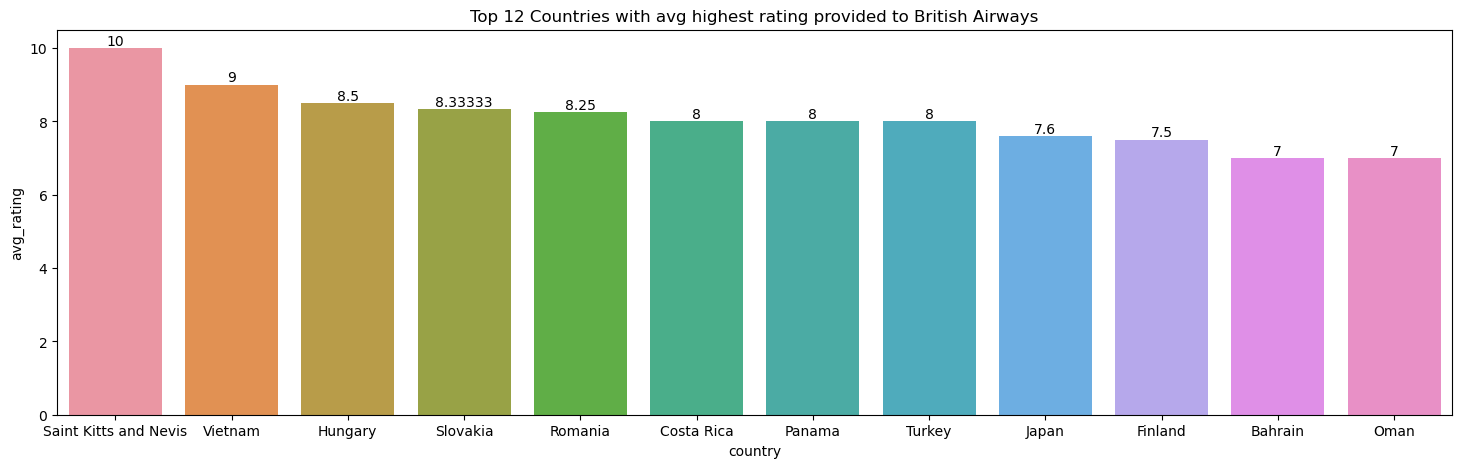

In [30]:

fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [31]:
###Time Series Analysis

#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [30]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

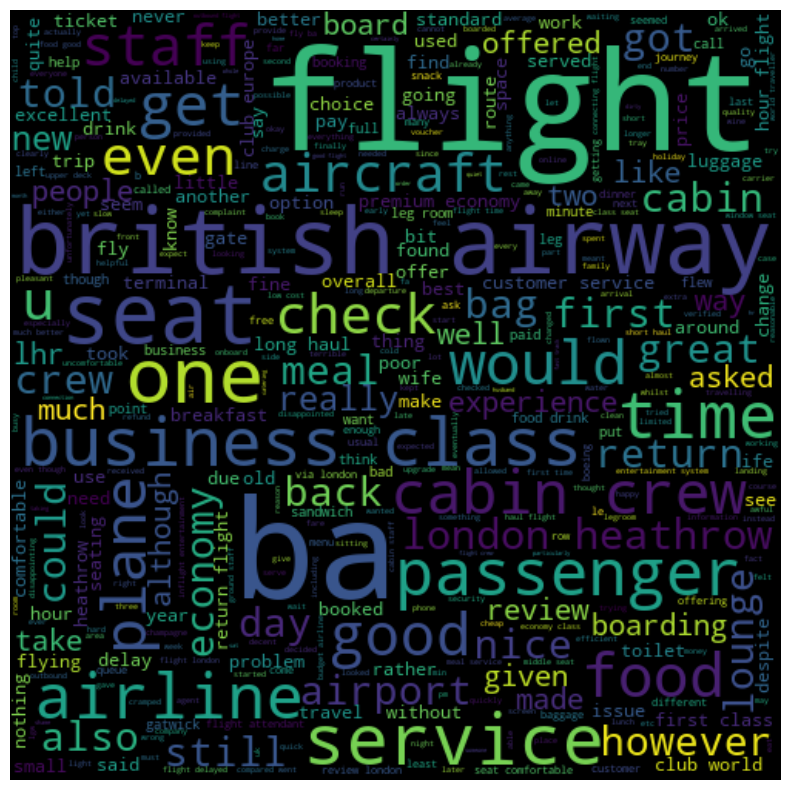

In [32]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=90, max_words=400, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

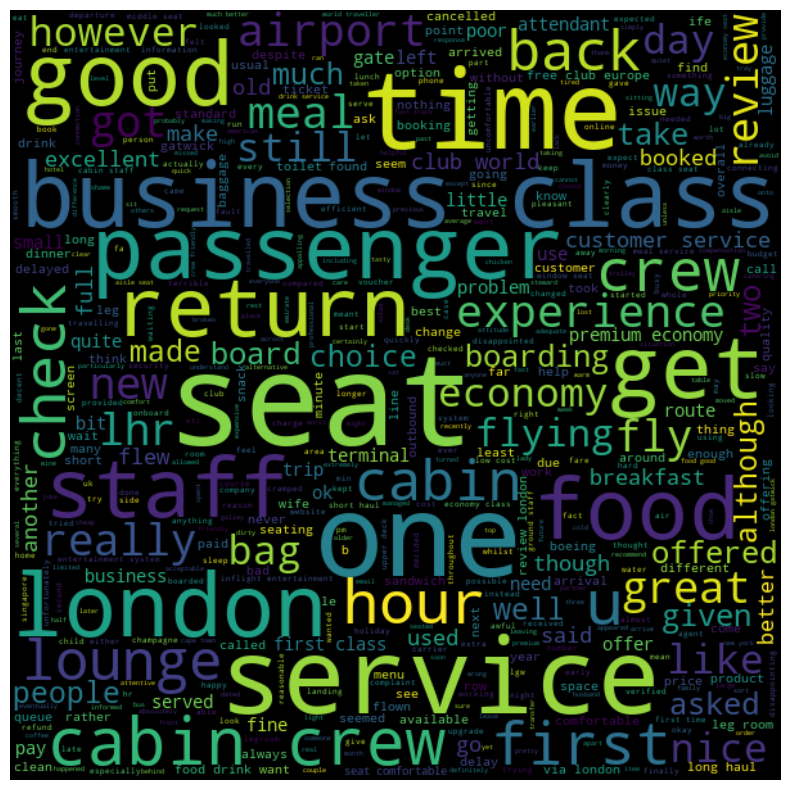

In [33]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
#Word Frequency
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'food'),
  Text(3, 0, 'time'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

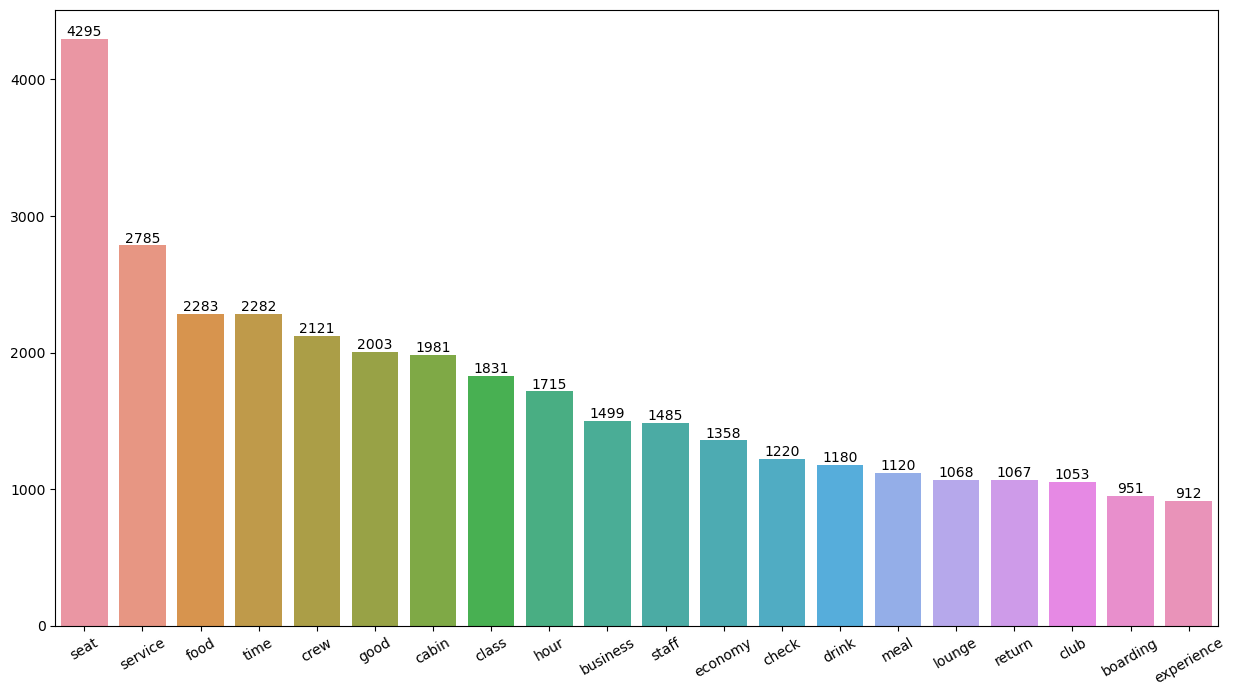

In [36]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<AxesSubplot:>

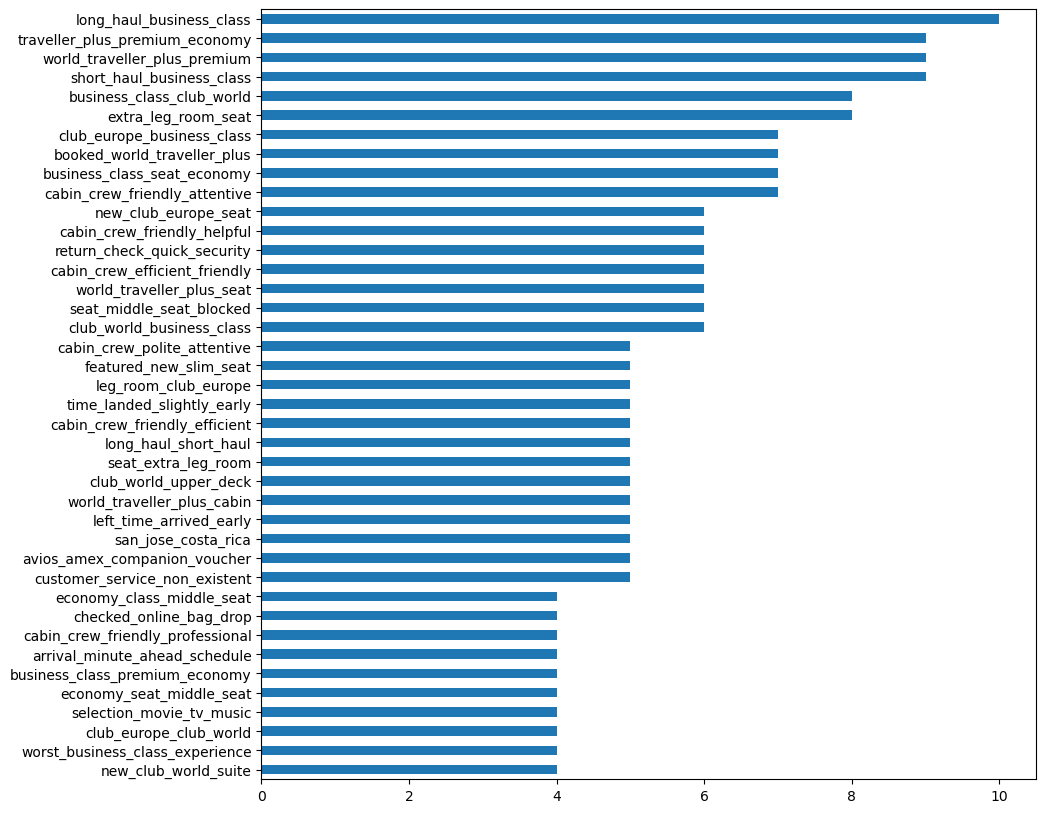

In [37]:
#Word Frequency with N-gram
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [38]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

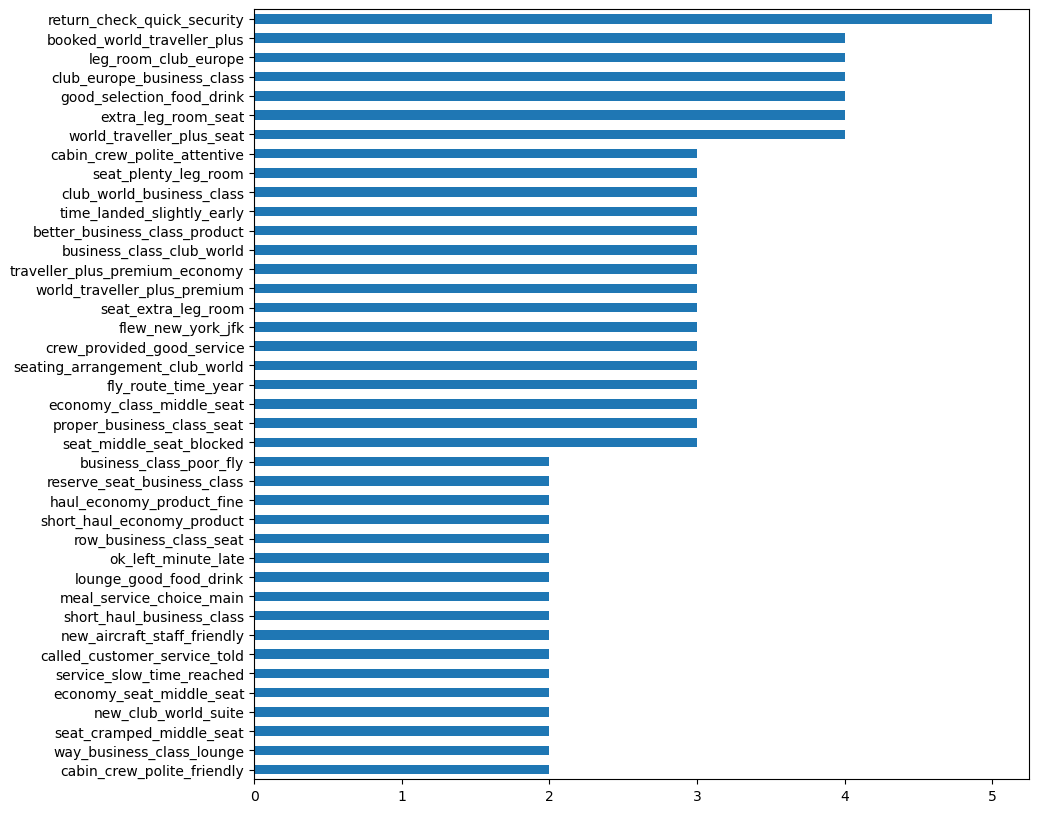

In [39]:

reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

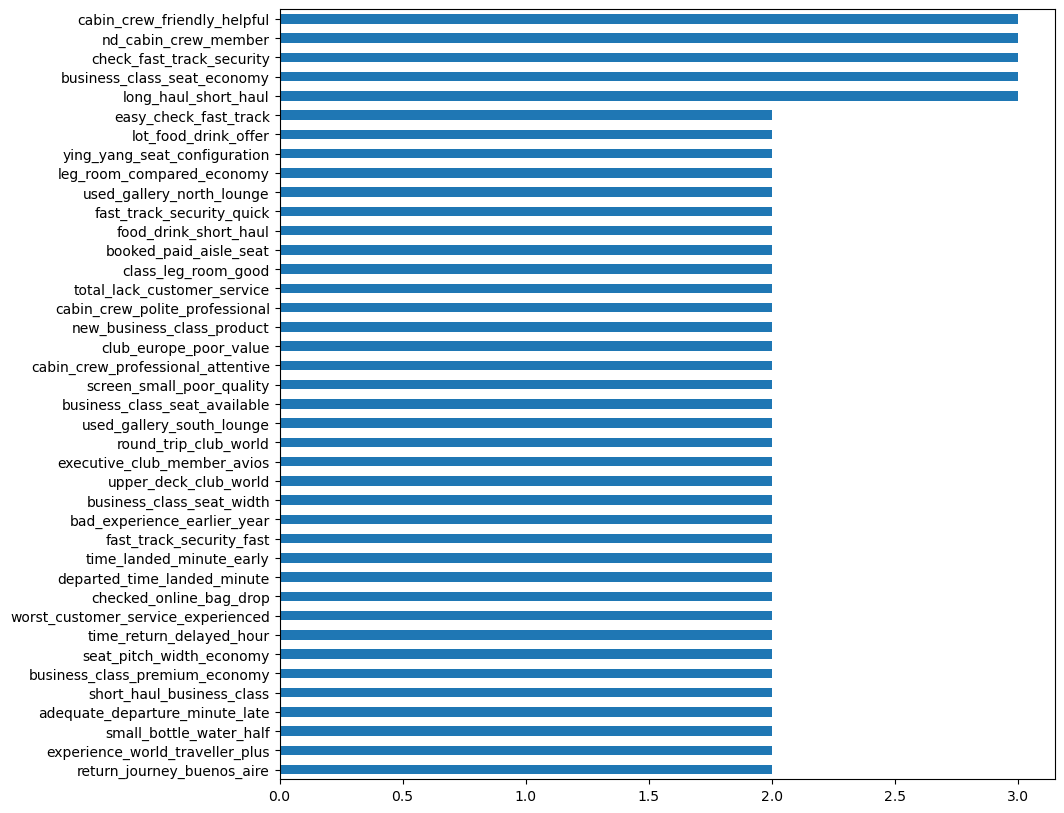

In [40]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

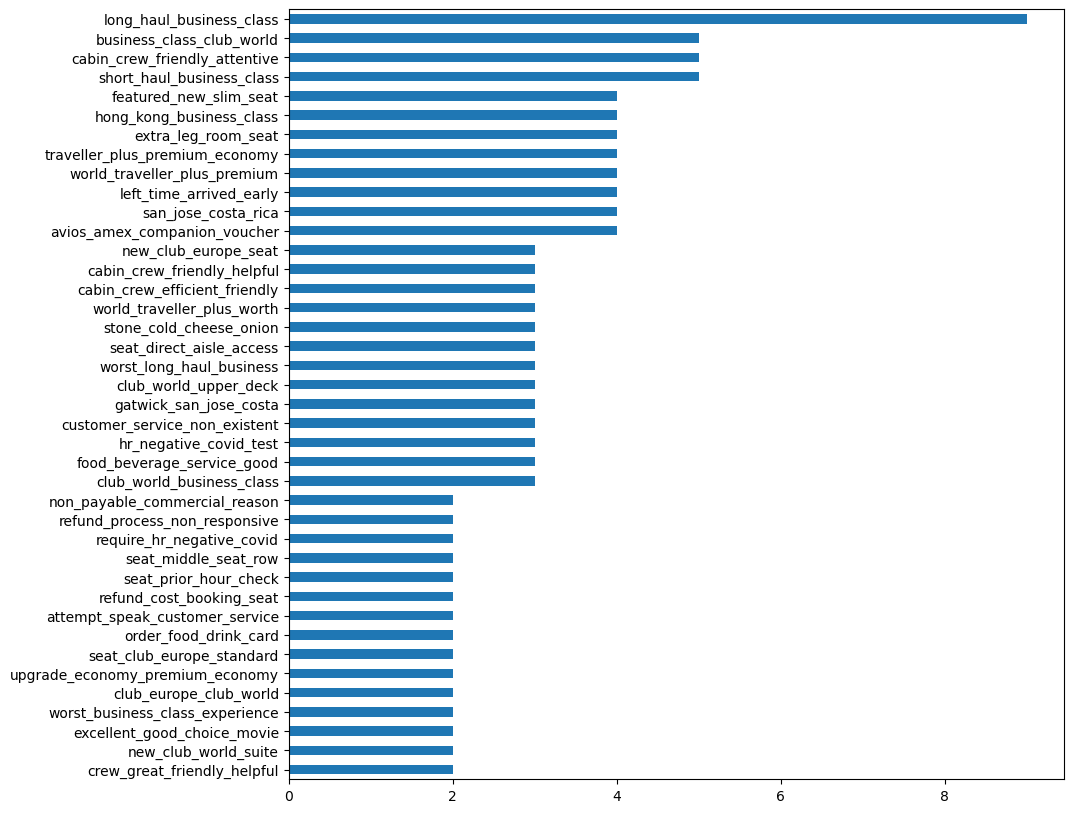

In [41]:

new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [52]:
!pip install textblob


In [55]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent = TextBlob(df.corpus[i])
    polarity = sent.sentiment.polarity
    df.loc[i, 'polarity'] = polarity

In [56]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2317 number of reviews between -0.2 and 0.2 polarity score
1333 number of reviews between -0.1 and 0.1 polarity score


In [60]:
import nltk
nltk.download('vader_lexicon')  # download the VADER lexicon if needed

from nltk.sentiment.vader import SentimentIntensityAnalyzer 

vds = SentimentIntensityAnalyzer()

# set a column 'label' with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):
    score = vds.polarity_scores(df.corpus[i])['compound']
    if score > 0.2:
        df.loc[i, 'label'] = 1
    elif score < 0:
        df.loc[i, 'label'] = -1
    else:
        df.loc[i, 'label'] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/efz/nltk_data...


In [61]:
df.label.value_counts()

 1    2276
-1    1071
 0     117
Name: label, dtype: int64

In [62]:
#Topic Modeling with LDA

In [63]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()

In [64]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)


In [65]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        sister             9.6            ba           281.4       service   
1         prawn             7.4        flight           217.0        flight   
2       spinach             7.1         staff           126.6       british   
3      increase             6.9         check           121.4        airway   
4     barcelona             6.4           lhr            93.7            ba   
5           fco             5.9           one            84.7       airline   
6            th             5.5     passenger            81.8       carrier   
7         paris             5.2         plane            78.0         cabin   
8        fiance             5.1          crew            67.1        review   
9        durban             5.0          time            65.4          even   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           133.9        flight          2073.7        flight          2998.4   
1           105.4            ba          1193.5          good          1598.5   
2            91.9          hour           657.5          crew          1445.7   
3            80.9        airway           602.4            ba          1298.8   
4            75.6       british           596.0          seat          1220.7   
5            70.4      customer           578.2          time          1191.8   
6            66.9        london           573.7          food          1190.0   
7            59.5       service           550.9         cabin          1133.7   
8            59.0         would           527.9       service          1125.2   
9            53.8          told           458.4         drink           728.2   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0          seat          2554.2           bag           413.5       british   
1            ba          1552.3        flight           381.9        airway   
2         class          1302.7          hour           216.2        flight   
3        flight          1154.7       luggage           207.6          meal   
4      business          1147.7       baggage           174.0          food   
5       economy           860.4          time           161.9       airline   
6       service           667.2           one           158.1       service   
7          food           662.6        minute           148.8        london   
8         cabin           614.9         check           146.4         drink   
9       airline           585.1      boarding           131.0            ba   

  Topic 7 weights  
0           441.3  
1           432.9  
2           371.8  
3           354.9  
4           323.3  
5           320.2  
6           260.6  
7           232.8  
8           180.3  
9           177.9

In [66]:
#Topic modeling with NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.0930343 , 0.03040858],
       [0.03293549, 0.        ],
       [0.05249756, 0.02217503],
       ...,
       [0.03421465, 0.07180463],
       [0.02196014, 0.02212475],
       [0.09950423, 0.18415401]])

In [67]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [68]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            36.1          seat            14.5
1            ba            12.1            ba             7.7
2          hour             8.0         class             6.2
3          time             7.2      business             4.9
4        london             6.4          food             4.8
5       service             6.0       service             4.6
6        airway             5.8         cabin             4.5
7       british             5.7          good             4.1
8         would             5.1          crew             4.0
9         staff             4.5       economy             3.8

In [ ]:
#With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.